In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Wrangling

In [2]:
df=pd.read_csv('/kaggle/input/noshowappointments/KaggleV2-May-2016.csv')

In [3]:
pd.set_option('display.max_rows',None)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


***The data doesn't contains null values **

In [5]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

**Data Cleaning**

In [6]:
df.Handcap.value_counts()

Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64

In [7]:

df['Handcap'].replace(2 ,1 ,inplace=True)
df['Handcap'].replace(3 ,1 ,inplace=True)
df['Handcap'].replace(4 ,1 ,inplace=True)

In [8]:
# Convert ScheduledDay and AppointmentDay to datetime type

df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

In [9]:
df['No-show'] = df['No-show'].map(
                   {'Yes':1 ,'No':0})
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

**Since we have 0 null values and 0 duplicated data**

In [11]:
print('patient id duplicates:',df.PatientId.duplicated().sum())
print('appointment id duplicates:',df.AppointmentID.duplicated().sum())

patient id duplicates: 48228
appointment id duplicates: 0


* Looks like AppointmentID has no duplicates so we can use it as an index.
* PatientID duplicating make sense , it means that the same patient had several appointments.

In [12]:
# Check if there is rows with the same only patient id and appointment id

print(df.duplicated(["PatientId","AppointmentID"]).sum())

0


In [13]:
print('Number of Patients with unique ID:',len(df.PatientId.unique()))
print('Number of Appointments:',df.PatientId.value_counts().sum())

Number of Patients with unique ID: 62299
Number of Appointments: 110527


In [14]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.020276,0.321026,0.201933
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.140942,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Check Age
#There is just 1 value = -1 : We will drop it.
df.drop(df.query("Age == -1").index,inplace=True)
print(df.Age.describe())

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64


In [16]:
# percentage of male and female in the dataset

print(round(df.Gender.value_counts()/len(df)*100))

Gender
F    65.0
M    35.0
Name: count, dtype: float64


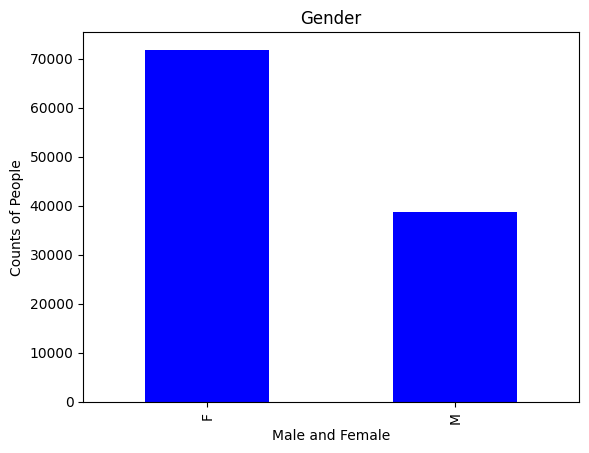

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
df['Gender'].value_counts().plot(kind="bar", color="b")
sns.set(style="whitegrid")  # Using seaborn for styling
plt.title("Gender")
plt.xlabel('Male and Female')
plt.ylabel('Counts of People')
plt.show()


**(How the age of the patients affects the show-up?)**

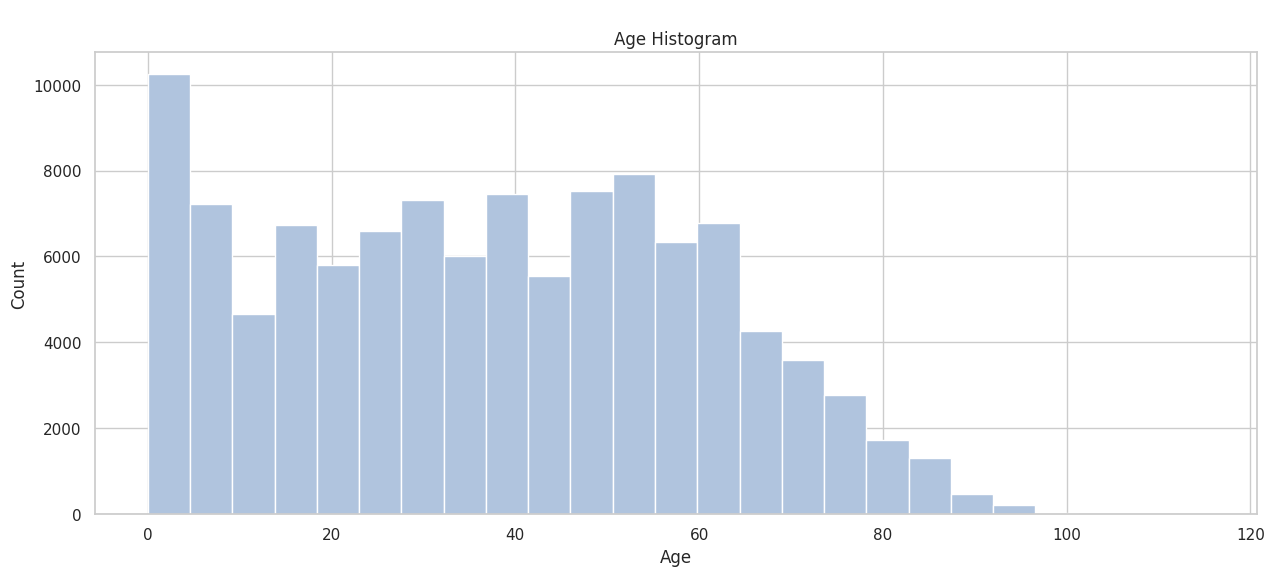

In [18]:
df.Age.hist(bins=25, color = "lightsteelblue",figsize=(15,6)) 
plt.xlabel("Age") 
plt.ylabel("Count") 
plt.title("\nAge Histogram");

* How Gender of the patient affects his/her show-up?

In [19]:
Gender_count = df.groupby("Gender")["No-show"].value_counts()
print(Gender_count)

Gender  No-show
F       0          57245
        1          14594
M       0          30962
        1           7725
Name: count, dtype: int64


<Figure size 1400x600 with 0 Axes>

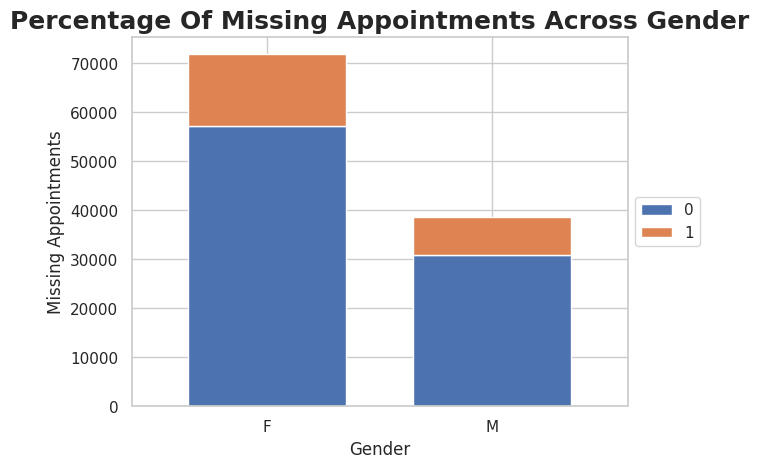

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

def MyHistplot(df, xVar, figsize=(14, 6), stacked=True, normalize=False):
    """
    Plot a bar chart to visualize the percentage of missing appointments across different categories using seaborn.

    Parameters:
    - df (DataFrame): The input DataFrame containing data.
    - xVar (str): The categorical variable for grouping.
    - figsize (tuple, optional): Figure size (default is (14, 6)).
    - stacked (bool, optional): Whether to plot stacked bars (default is True).
    - normalize (bool, optional): Whether to normalize the counts (default is False).

    Returns:
    - None
    """
    plt.figure(figsize=figsize)

    # Calculate the percentage of missing appointments
    plot_data = df.groupby(xVar)['No-show'].value_counts(normalize=normalize).mul(int(f'{100 if normalize else 1}')).round(2).unstack()

    # Plotting using seaborn
    if normalize:
        total_percentage = df['No-show'].value_counts(normalize=True).mul(100)[0]
        sns.barplot(x=xVar, y='No-show', data=df, hue='No-show', estimator=lambda x: len(x) / len(df) * total_percentage, ci=None, palette="muted", edgecolor='white')
    else:
        plot_data.plot(kind="bar", stacked=stacked, width=0.7, edgecolor='white', rot=0)

    plt.ylabel("Missing Appointments")
    plt.title(f"Percentage of Missing Appointments Across {xVar}".title(), fontsize=18, weight='bold')

    if normalize:
        plt.axhline(total_percentage, color='maroon', ls='-.', alpha=0.75, label='Proportion of Attendance (All Patients)')

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# Call the function with your actual DataFrame and category variable
MyHistplot(df, 'Gender')


**How the age of the patients affects the show-up?**

In [21]:
# making masks to use later

miss = df["No-show"] == 1
show = df["No-show"] == 0

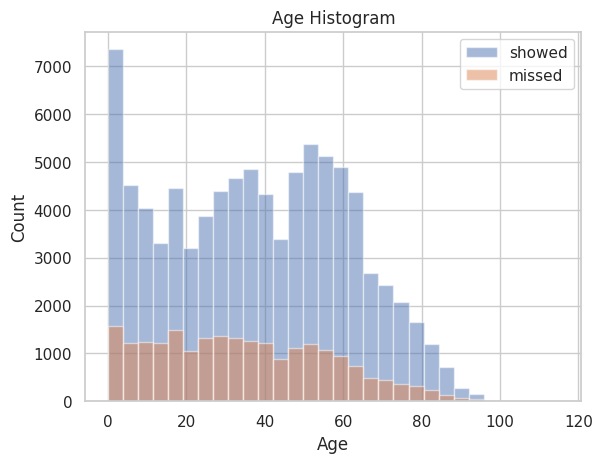

In [22]:
# histogram for ages of patients

df[show].Age.hist(alpha=0.5, bins=30,label="showed")
df[miss].Age.hist(alpha=0.5, bins=30,label="missed")
plt.legend();
plt.title("Age Histogram")
plt.xlabel("Age")
plt.ylabel("Count");

<Figure size 3000x800 with 0 Axes>

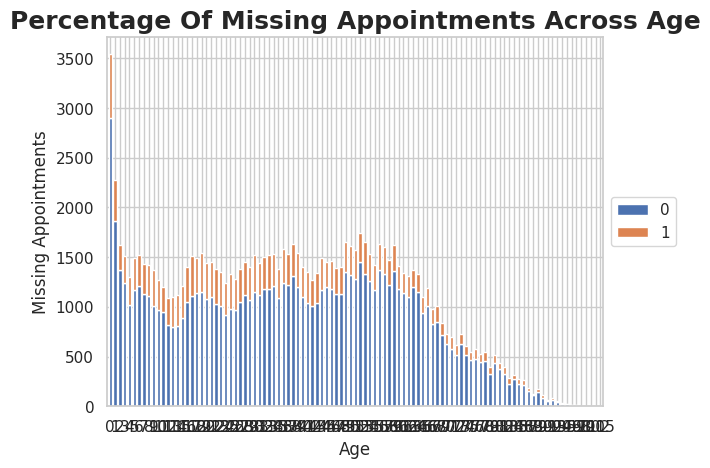

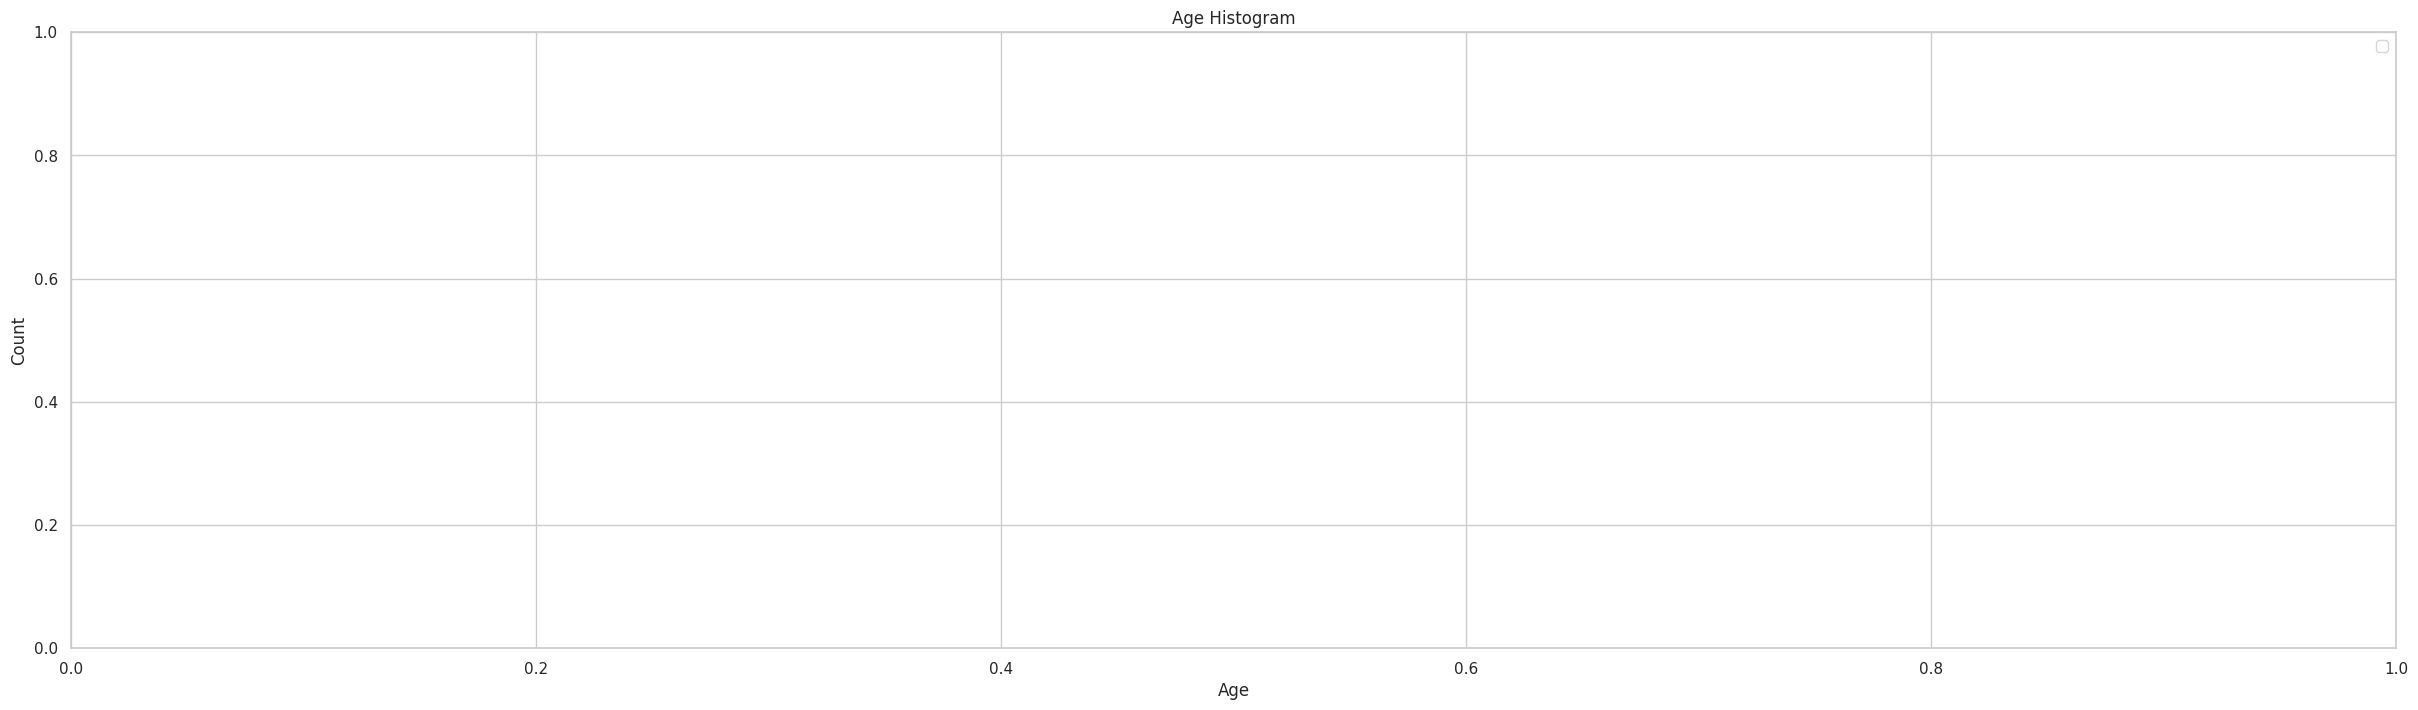

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

def MyHistplot(df, xVar, figsize=(14, 6), stacked=True, normalize=False):
    """
    Plot a bar chart and histogram to visualize the percentage of missing appointments and the distribution of ages.

    Parameters:
    - df (DataFrame): The input DataFrame containing data.
    - xVar (str): The categorical variable for grouping.
    - figsize (tuple, optional): Figure size (default is (14, 6)).
    - stacked (bool, optional): Whether to plot stacked bars (default is True).
    - normalize (bool, optional): Whether to normalize the counts (default is False).

    Returns:
    - None
    """
    # Plot Bar Chart
    plt.figure(figsize=figsize)

    # Calculate the percentage of missing appointments
    plot_data = df.groupby(xVar)['No-show'].value_counts(normalize=normalize).mul(int(f'{100 if normalize else 1}')).round(2).unstack()

    # Plotting using seaborn
    if normalize:
        total_percentage = df['No-show'].value_counts(normalize=True).mul(100)[0]
        sns.barplot(x=xVar, y='No-show', data=df, hue='No-show', estimator=lambda x: len(x) / len(df) * total_percentage, ci=None, palette="muted", edgecolor='white')
    else:
        plot_data.plot(kind="bar", stacked=stacked, width=0.7, edgecolor='white', rot=0)

    plt.ylabel("Missing Appointments")
    plt.title(f"Percentage of Missing Appointments Across {xVar}".title(), fontsize=18, weight='bold')

    if normalize:
        plt.axhline(total_percentage, color='maroon', ls='-.', alpha=0.75, label='Proportion of Attendance (All Patients)')

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Plot Age Histogram
    plt.figure(figsize=(30, 8))
    sns.histplot(df[df['No-show'] == 'No'].Age, label="Showed", kde=False, color="skyblue", bins=30)
    sns.histplot(df[df['No-show'] == 'Yes'].Age, label="Missed", kde=False, color="salmon", bins=30)

    plt.legend()
    plt.title("Age Histogram")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()

# Call the function with your actual DataFrame and category variable
MyHistplot(df, 'Age', figsize=[30, 8])


**Let's assume you want to predict whether a patient will show up for an appointment based on certain features in your dataset. The features can include variables like 'Age', 'Gender', or any other relevant information. In this example, I'll use a few features for illustration purposes**

In [24]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your data (replace 'your_data.csv' with the actual file path)
df = pd.read_csv('/kaggle/input/noshowappointments/KaggleV2-May-2016.csv')

# Assume 'No-show' is the target variable, and 'Age', 'Gender' are features
# You should choose relevant features based on your data
features = ['Age', 'Gender']

# Extract features and target variable
X = df[features]
y = df['No-show']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Accuracy: 0.80

Confusion Matrix:
[[17669     0]
 [ 4436     1]]

Classification Report:
              precision    recall  f1-score   support

          No       0.80      1.00      0.89     17669
         Yes       1.00      0.00      0.00      4437

    accuracy                           0.80     22106
   macro avg       0.90      0.50      0.44     22106
weighted avg       0.84      0.80      0.71     22106



*Certainly! To compare multiple machine learning models, you can use the scikit-learn library's *model_selection module to perform cross-validation and evaluate each model's performance. Below is *an example comparing three classification models: RandomForestClassifier, LogisticRegression, and *DecisionTreeClassifier.

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Load your data (replace 'your_data.csv' with the actual file path)
df = pd.read_csv('/kaggle/input/noshowappointments/KaggleV2-May-2016.csv')

# Assume 'No-show' is the target variable, and 'Age', 'Gender' are features
# You should choose relevant features based on your data
features = ['Age', 'Gender']

# Extract features and target variable
X = df[features]
y = df['No-show']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create instances of different classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
lr_classifier = LogisticRegression(random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)

# List of classifiers and their names
classifiers = [('Random Forest', rf_classifier),
               ('Logistic Regression', lr_classifier),
               ('Decision Tree', dt_classifier)]

# Compare models using cross-validation
for clf_name, clf in classifiers:
    cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print(f'{clf_name}: Mean Accuracy - {cross_val_scores.mean():.2f}, Standard Deviation - {cross_val_scores.std():.2f}')

# Train and evaluate the best model on the test set
best_model = max(classifiers, key=lambda x: cross_val_score(x[1], X_train, y_train, cv=5, scoring='accuracy').mean())[1]
best_model.fit(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)
print(f'\nBest Model (on Test Set): {best_model.__class__.__name__} - Accuracy: {test_accuracy:.2f}')


Random Forest: Mean Accuracy - 0.80, Standard Deviation - 0.00
Logistic Regression: Mean Accuracy - 0.80, Standard Deviation - 0.00
Decision Tree: Mean Accuracy - 0.80, Standard Deviation - 0.00

Best Model (on Test Set): LogisticRegression - Accuracy: 0.80


**If you liked the notebook and found it useful to learn, give an upvote 👍🏻:)**